ToDo:
- Add 1p1v as benchmarks on QV graphs

# Imports + Loading Data + Helper Functions

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib     
font = {'size'   : 12}
matplotlib.rc('font', **font)

In [255]:
def to_array(string):
    return np.array([float(el) for el in string.replace("[", "").replace("]","").split(" ")])

df = pd.read_csv('2020.02.19-multi-issue-QV-non-strategic-voting.csv')

cols_to_drop = ['vote-portion-strategic', 'proportion-of-strategic-voters', 'minority-power',
               'y-axis', 'x-axis', 'issue-num', 'poll-response-rate', '[step]']
df.drop(columns=cols_to_drop, inplace=True)

df['total-payoff-per-issue'] = df['total-payoff-per-issue'].apply(to_array)
df['mean-utilities'] = df['mean-utilities'].apply(to_array)
df['median-utilities'] = df['median-utilities'].apply(to_array)
df['mean-median-same-sign-list'] = df['mean-median-same-sign-list'].apply(to_array)

def WL_per_issue(payoffs):
    return (payoffs < 0) * 1

df['WL-per-issue'] = df['total-payoff-per-issue'].apply(WL_per_issue)
df['mean-WL'] = df['WL-per-issue'].apply(np.mean)

In [256]:
# checking that mean-WL is 0 whenever maximial-utility? is True and is >0 when maximal utility is false
all(df['maximal-utility?'].apply(lambda mu: not mu) == np.ceil(df['mean-WL']))

True

In [283]:

# Helper functions
def plot_WL_vs_n_issues(ladf, 
                        title, 
                        hue='number-of-voters', 
                        ylim=(0, 0.25), 
                        WL_col = "mean-WL"):
    
    ax2 = sns.scatterplot(x="number-of-issues", 
                     y=WL_col,
                     hue=hue,
                     data = ladf,)

    ax2.set(ylim=ylim,
           xlabel = "number-of-issues")

    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

def plot_WL_vs_n_voters(ladf, title, 
                        hue='number-of-issues', 
                        ylim = (0, 0.25),
                        WL_col="mean-WL"):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x="number-of-voters", 
                    y=WL_col,
                    data = ladf,
                    hue=hue,
                    ax=ax1)

    sns.scatterplot(x="number-of-voters", 
                    y=WL_col,
                    data = ladf,
                    hue=hue,
                    ax=ax2)
    
    ax1.legend_.remove()
    ax2.set(xscale="log", xlabel = "number-of-voters (log scale)")
    ax1.set(ylim=ylim, xlim=(0, 10100))
    ax2.set(ylim=ylim)
    f.suptitle(title)
    
    
    plt.show()

# Wellfare loss of QV and 1p1v in multi-issue voting -- all utilities from normal distrubution with $\mu=0$

## Dataframe prep

In [109]:
df_normal = df[df['utility-distribution'] == "Normal mean = 0"] 
dfn_qv = df_normal[df_normal['QV?'] == True]
dfn_1p1v = df_normal[df_normal['QV?'] == False]

## 1p1v wellfare loss - all utilities from normal distrubution with $\mu=0$

As expected, wellfare loss doesn't depend on number of issues or number of voters for 1p1v with all utility distrubtions normal with $\mu=0$

### Dataframe prep

In [273]:
adf_1p1v = dfn_1p1v.groupby(['number-of-voters', 'number-of-issues']).aggregate('mean').reset_index()
n_issues_dict = {2:'two', 4: 'four', 6: 'six', 8: 'eight', 10: 'ten'}
adf_1p1v['num_issues'] = adf_1p1v['number-of-issues'].apply(lambda x: n_issues_dict[x])

### 1p1v wellfare loss vs  number of voters and issues

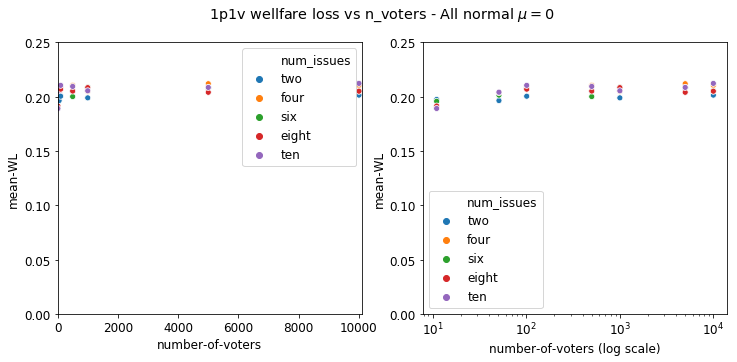

In [276]:
plot_WL_vs_n_voters(adf_1p1v, '1p1v wellfare loss vs n_voters - All normal $\mu=0$', hue='num_issues')

## QV  wellfare loss - all utilities from normal distrubution with $\mu=0$

### Dataframe prep

In [277]:
## Prepare aggregate data frame
adf_qv = dfn_qv.groupby(['number-of-voters', 'number-of-issues']).aggregate('mean').reset_index()
n_issues_dict = {2:'two', 4: 'four', 6: 'six', 8: 'eight', 10: 'ten'}
adf_qv['num_issues'] = adf_qv['number-of-issues'].apply(lambda x: n_issues_dict[x])
adf_qv['n-voters'] = adf_qv['number-of-voters'].apply(lambda n: "=" + str(n))


### QV wellfare loss vs number of voters

Seems that in this case (all normal distrubtions), wellfare loss does not significantly decrease with number of voters, at least not up to 10k voters. 

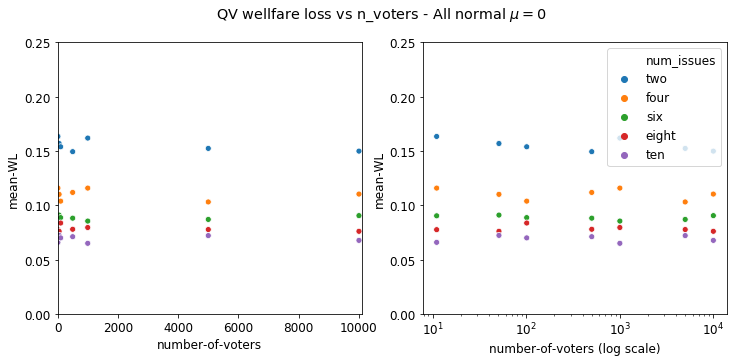

In [284]:
plot_WL_vs_n_voters(adf_qv, 'QV wellfare loss vs n_voters - All normal $\mu=0$', hue='num_issues')

### QV wellfare loss vs number of issues

Wellfare loss decreases slowly with the number of issues. It reaches about .07 with ten issues. 

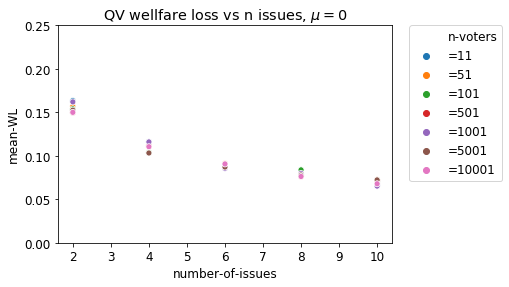

In [281]:
plot_WL_vs_n_issues(adf_qv, 'QV wellfare loss vs n issues, $\mu=0$', hue='n-voters')

# Wellfare loss of QV and 1p1v in multi-issue voting -- all utilities from normal distrubution with $\mu=0$ except for one with Prop8 Calibration

## Dataframe prep

In [258]:
df_prop8 = df[df['utility-distribution'] == "Prop8 mean>0"].copy()
df_prop8['Prop8-WL'] = df_prop8['WL-per-issue'].apply(lambda ar: ar[0])
df8_qv = df_prop8[df_prop8['QV?'] == True]
df8_1p1v = df_prop8[df_prop8['QV?'] == False]

## 1p1v wellfare loss

### Dataframe prep

In [260]:
adf_8_1p1v = df8_1p1v.groupby(['number-of-voters', 'number-of-issues']).aggregate('mean').reset_index()
n_issues_dict = {2:'two', 4: 'four', 5:'five', 6: 'six', 8: 'eight', 10: 'ten'}
adf_8_1p1v['num_issues'] = adf_8_1p1v['number-of-issues'].apply(lambda x: n_issues_dict[x])
adf_8_1p1v['n-voters'] = adf_8_1p1v['number-of-voters'].apply(lambda n: "=" + str(n))

### 1p1v wellfare loss vs number of voters

#### Avg WL of all issues

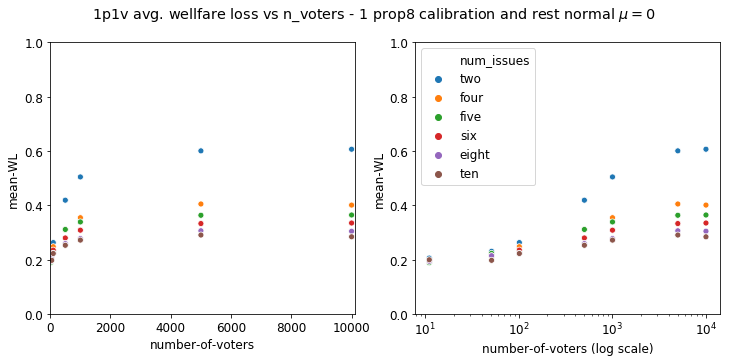

In [285]:
    
plot_WL_vs_n_voters(adf_8_1p1v, 
                    '1p1v avg. wellfare loss vs n_voters - 1 prop8 calibration and rest normal $\mu=0$', 
                    hue='num_issues',
                    ylim=(0,1))

#### WL of Prop8 Issues

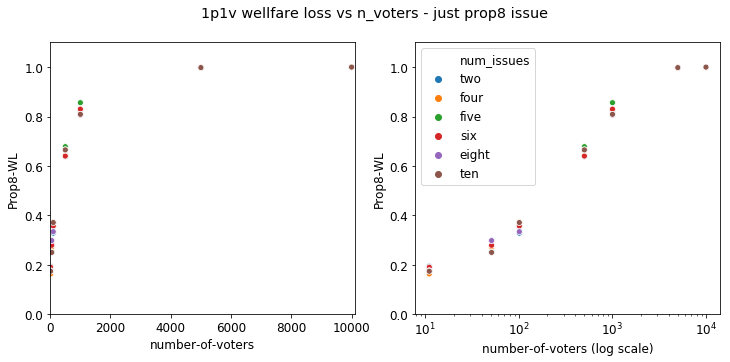

In [286]:
# adf_8_1p1v[adf_8_1p1v['number-of-issues'].isin([10])]
plot_WL_vs_n_voters(adf_8_1p1v, 
                    '1p1v wellfare loss vs n_voters - just prop8 issue', 
                    hue='num_issues',
                    ylim=(0,1.1),
                    WL_col = "Prop8-WL")

### 1p1v wellfare loss vs number of issues

#### Avg of all issues

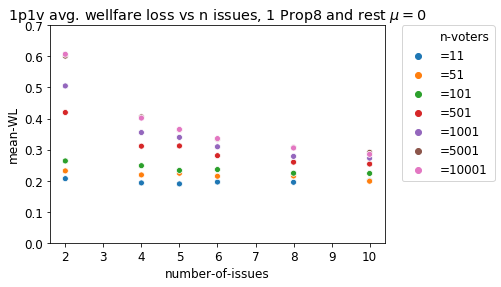

In [287]:
plot_WL_vs_n_issues(adf_8_1p1v, 
                    '1p1v avg. wellfare loss vs n issues, 1 Prop8 and rest $\mu=0$', 
                     hue='n-voters',
                     ylim=(0, 0.7))

#### Just Prop8 issue

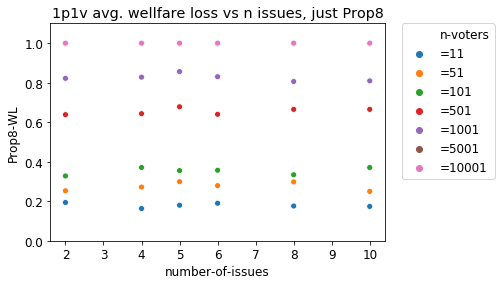

In [288]:
plot_WL_vs_n_issues(adf_8_1p1v, 
                    '1p1v avg. wellfare loss vs n issues, just Prop8', 
                     hue='n-voters',
                     ylim=(0, 1.1),
                     WL_col = "Prop8-WL")

## QV Wellfare loss

### Dataframe prep

In [289]:
adf_8_qv = df8_qv.groupby(['number-of-voters', 'number-of-issues']).aggregate('mean').reset_index()
n_issues_dict = {2:'two', 4: 'four', 5: 'five', 6: 'six', 8: 'eight', 10: 'ten'}
adf_8_qv['num_issues'] = adf_8_qv['number-of-issues'].apply(lambda x: n_issues_dict[x])
adf_8_qv['n-voters'] = adf_8_qv['number-of-voters'].apply(lambda n: "=" + str(n))

### WL vs Number of Voters

#### Avg WL of all issues

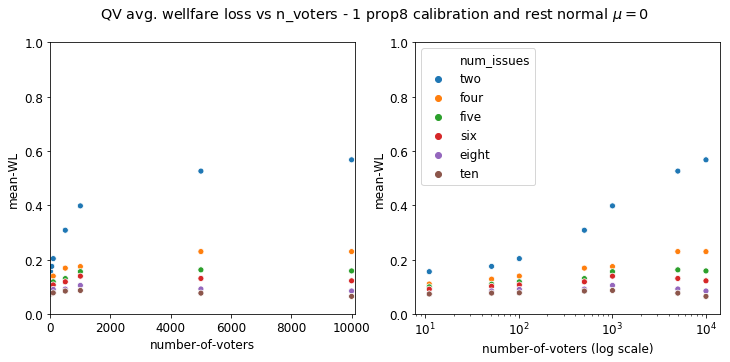

In [290]:
    
plot_WL_vs_n_voters(adf_8_qv, 
                    'QV avg. wellfare loss vs n_voters - 1 prop8 calibration and rest normal $\mu=0$', 
                    hue='num_issues',
                    ylim=(0,1))

#### WL of Just Prop8

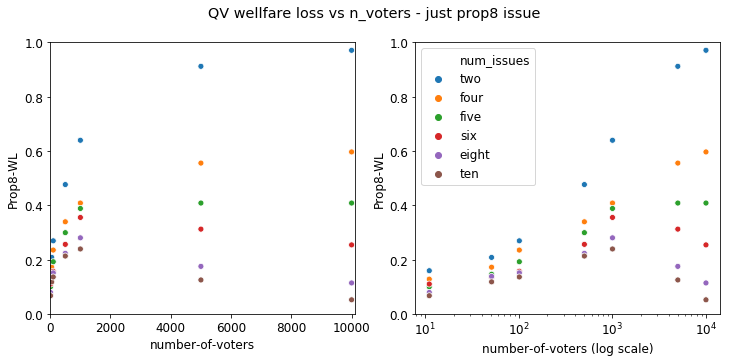

In [291]:
plot_WL_vs_n_voters(adf_8_qv, 
                    'QV wellfare loss vs n_voters - just prop8 issue', 
                    hue='num_issues',
                    ylim=(0,1),
                    WL_col = "Prop8-WL")

### Wellfare vs number of issues

#### Avg of all issues

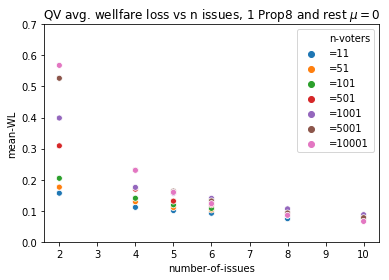

In [269]:
plot_WL_vs_n_issues(adf_8_qv, 
                    'QV avg. wellfare loss vs n issues, 1 Prop8 and rest $\mu=0$', 
                     hue='n-voters',
                     ylim=(0, 0.7))

#### Just Prop8 issue

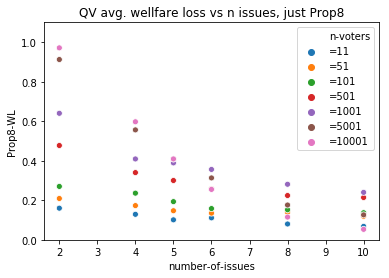

In [270]:
plot_WL_vs_n_issues(adf_8_qv, 
                    'QV avg. wellfare loss vs n issues, just Prop8', 
                     hue='n-voters',
                     ylim=(0, 1.1),
                     WL_col = "Prop8-WL")